In [1]:
import pandas as pd

In [21]:
df = pd.read_csv(r'sdcCompiled.csv')

In [22]:
df.head()

,'TCA_1 ','TCA_2 ','TCA_3 ','TCA_4 ','TCA_5 ','TCA_6 ','TCA_7 ','TCB_1 ','TCB_2 ','TCB_3 ',...,'Ion1A ','Ion1C ','Ion1D ','Ion1BE','DiPho2','DiIon2','DiIon4','Load ','TCRef ',Label
0,26.5,25.0,24.8,24.8,24.7,24.6,24.4,26.5,26.5,26.2,...,5.25,5.77,6.14,5.95,0.0,0.001,0.0,0.000,23.6,0.0
1,26.2,25.0,24.9,24.8,24.7,24.6,24.4,26.7,26.5,26.2,...,5.26,5.77,6.12,5.97,0.0,0.001,0.0,0.006,23.6,0.0
2,26.0,25.0,24.9,24.8,24.7,24.6,24.4,26.6,26.5,26.2,...,5.28,5.77,6.14,5.94,0.0,0.001,0.0,0.006,23.6,0.0
3,26.5,25.0,24.9,24.8,24.7,24.6,24.4,26.5,26.7,26.2,...,5.27,5.80,6.14,5.96,0.0,0.001,0.0,0.006,23.6,0.0
4,26.7,25.0,24.9,24.8,24.6,24.6,24.6,26.7,26.6,26.2,...,5.25,5.78,6.15,5.96,0.0,0.001,0.0,0.006,23.6,0.0


In [29]:
df.count()

'TCA_1 '    5450
'TCA_2 '    5450
'TCA_3 '    5450
'TCA_4 '    5450
'TCA_5 '    5450
            ... 
'DiIon2'    5450
'DiIon4'    5450
'Load  '    5450
'TCRef '    5450
Label       5450
Length: 118, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Label'], axis='columns'), df['Label'], test_size=0.2)

In [24]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

D:\Python\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
model.score(X_test, y_test)

0.9963302752293578

In [26]:
y_predicted = model.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[250,   1],
       [  3, 836]], dtype=int64)

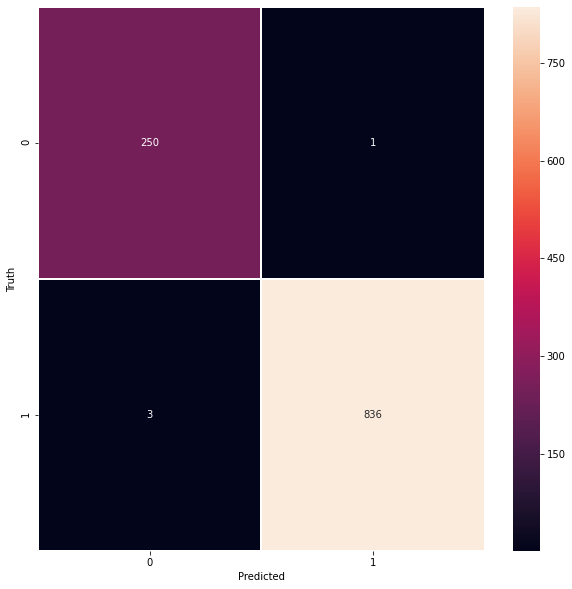

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, linewidths=1, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()